<center>
$$ \huge \textbf{FundusR50: ResNet50 Model} $$  🧠👁️  
</center>

**Purpose:**  
- 💡 Classifies fundus images as 'Normal' or 'AbNormal' for Alzheimer's detection.

**Model Overview:**  
- 🔑 **Backbone:** ResNet50 — A powerful residual network with 50 layers.

**Techniques Used:**  
- 🔄 **Transfer Learning:** Pre-trained on ImageNet for better generalization.  
- ⚖️ **Binary Cross-Entropy Loss** for classification.  
- 🧑‍🏫 **Adam Optimizer** with a learning rate of **0.0001**.  
- ⚖️ **Class Weight Balancing** to handle class imbalance.  
- ⏱️ **Callbacks:** Early stopping & ReduceLROnPlateau for optimized training.

In [ ]:
# Step 1: Mount Google Drive & Load Data
from google.colab import drive
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

drive.mount('/content/drive')

# Define Paths
normal_path = "/content/drive/MyDrive/Fundus-ModelData/Train-Imgs/0_Normal"
abnormal_path = "/content/drive/MyDrive/Fundus-ModelData/Train-Imgs/1_Abnormal"

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=(224, 224))  # Resize
        img_array = img_to_array(img) / 255.0  # Normalize
        images.append(img_array)
        labels.append(label)
    return images, labels

# Load data
normal_images, normal_labels = load_images_from_folder(normal_path, label=0)  # Normal → 0
abnormal_images, abnormal_labels = load_images_from_folder(abnormal_path, label=1)  # AbNormal → 1

# Convert to numpy arrays
X = np.array(normal_images + abnormal_images)
y = np.array(normal_labels + abnormal_labels)

# Split into train & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert to TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

# Step 2: Model Selection & Transfer Learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Training with Class Balancing
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=val_dataset,
    class_weight=class_weights,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
    ]
)

# Step 4: Evaluation & Model Saving
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Confusion Matrix & Report
y_pred = (model.predict(X_val) > 0.5).astype(int)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Save the model
model.save('/content/drive/MyDrive/Fundus-ModelData/Saved-Models/2-FundusR50-ResNet50/FundusR50-Report')

**Prediction:**
- 🧑‍💻 Predict whether new fundus images are 'Normal' or 'AbNormal'.

**Steps:**
1. 📂 Load the pre-trained model.  
2. 🔄 Preprocess the images (resize & normalize).  
3. 📊 Run the images through the model for predictions.  
4. 🧐 Display the prediction result with confidence.

In [2]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=9bbb91e42aba938682e313114ab3d5ead75e4287dc60dbc331d3b63397c1c25a
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

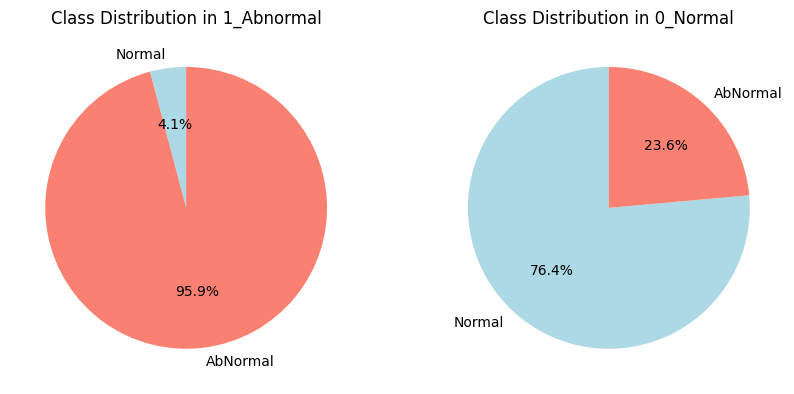

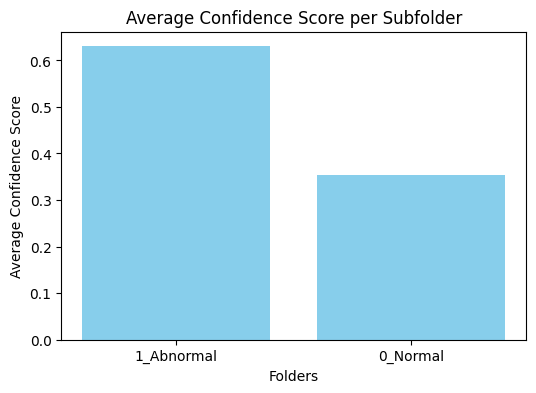

In [3]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from fpdf import FPDF
from google.colab import drive

# 🚀 Mount Google Drive
drive.mount('/content/drive')

# 🔍 Define paths
model_path = "/content/drive/MyDrive/Fundus-ModelData/Saved-Models/2-FundusR50-ResNet50/FundusR50.h5"  # Update with your saved model path
test_folder = "/content/drive/MyDrive/Fundus-ModelData/Test-Imgs"  # Folder containing subfolders with images
output_pdf_path = "/content/drive/MyDrive/Fundus-ModelData/Saved-Models/2-FundusR50-ResNet50/FundusR50-Report"

# 🧠 Load Trained Model
model = tf.keras.models.load_model(model_path)

# 🖼 Preprocess Image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Resize
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# 📂 Process Images & Predict
results = []
class_counts = {}  # For Pie Chart
confidence_scores = {}  # For Average Confidence Chart
threshold = 0.5  # Sigmoid activation threshold

for subfolder in os.listdir(test_folder):
    subfolder_path = os.path.join(test_folder, subfolder)

    if os.path.isdir(subfolder_path):  # Ensure it's a folder
        class_counts[subfolder] = {"Normal": 0, "AbNormal": 0}
        confidence_scores[subfolder] = []

        for image_name in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_name)

            # Predict class
            img_array = preprocess_image(image_path)
            prediction = model.predict(img_array)[0][0]
            predicted_class = "AbNormal" if prediction > threshold else "Normal"
            confidence_score = round(prediction, 4)

            # Track counts & confidence
            class_counts[subfolder][predicted_class] += 1
            confidence_scores[subfolder].append(confidence_score)

            # Store results
            results.append([image_name, subfolder, predicted_class, confidence_score])

# 📝 Convert results to DataFrame
df = pd.DataFrame(results, columns=["Image Name", "Folder", "Predicted Class", "Confidence Score"])

# 🎨 Generate Data Visualizations
fig, axes = plt.subplots(1, len(class_counts), figsize=(10, 5))
for i, (folder, counts) in enumerate(class_counts.items()):
    labels = counts.keys()
    sizes = counts.values()
    axes[i].pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=["lightblue", "salmon"])
    axes[i].set_title(f"Class Distribution in {folder}")
plt.savefig("/content/class_distribution.png")

# 📊 Average Confidence per Folder
avg_confidence = {folder: np.mean(scores) for folder, scores in confidence_scores.items()}
plt.figure(figsize=(6, 4))
plt.bar(avg_confidence.keys(), avg_confidence.values(), color="skyblue")
plt.xlabel("Folders")
plt.ylabel("Average Confidence Score")
plt.title("Average Confidence Score per Subfolder")
plt.savefig("/content/avg_confidence.png")

# 📄 Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Times", "B", 16)
        self.cell(275, 10, "Fundus Image Classification Report", ln=True, align="C")

    def footer(self):
        self.set_y(-15)
        self.set_font("Times", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

# 📑 Create PDF
pdf = PDF(orientation="L")  # Landscape Mode
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Times", size=12)

# 🏷 Report Header
pdf.set_font("Times", "B", 14)
pdf.cell(0, 10, "Model Details", ln=True)
pdf.set_font("Times", size=12)
pdf.cell(0, 10, f"Model Name: FundusR50", ln=True)
#pdf.cell(0, 10, f"Model Path: {model_path}", ln=True)
pdf.cell(0, 10, "Author: Danish A. G.", ln=True)
pdf.ln(10)

# 📋 Results Table
pdf.set_font("Times", "B", 12)

# Adjusted Column Widths
pdf.cell(140, 10, "Image Name", 1)  # Increased width
pdf.cell(40, 10, "Folder", 1)
pdf.cell(40, 10, "Predicted Class", 1)
pdf.cell(50, 10, "Confidence Score", 1)
pdf.ln()

pdf.set_font("Times", size=12)
for idx, row in df.iterrows():
    pdf.cell(140, 10, row["Image Name"], 1)  # Adjusted width
    pdf.cell(40, 10, row["Folder"], 1)
    pdf.cell(40, 10, row["Predicted Class"], 1)
    pdf.cell(50, 10, str(row["Confidence Score"]), 1)
    pdf.ln()

# 📊 Insert Pie Charts
pdf.ln(10)
pdf.cell(0, 10, "Class Distribution", ln=True, align="L")
pdf.image("/content/class_distribution.png", x=10, w=250)

# 📉 Insert Average Confidence Score Chart
pdf.ln(10)
pdf.cell(0, 10, "Average Confidence Score per Subfolder", ln=True, align="L")
pdf.image("/content/avg_confidence.png", x=10, w=250)

# 💾 Save PDF to Drive
pdf.output(output_pdf_path)
print(f"✅ Report saved at: {output_pdf_path}")